# UNIDAD 4 - PROYECTO: ANÁLISIS DE SENTIMIENTOS Y PREDICCIÓN.

## ALUMNO: JOSE ALEJANDRO TENORIO CHAVEZ
## NÚMERO DE CONTROL: 20120161


## PRESENTACIÓN.

El siguiente proyecto consiste en emplear el análisis de sentimientos para tratar de predecir las calificaciones de una serie.

El dataset es sobre las calificaciones que recibió la adaptación al "live-action" el anime "OnePiece".

El dataset contiene las reseñas que se recibieron en la plataforma de Netflix, el dataset contiene información como:

* Título.
* Reseña.
* Fecha.
* Calificación.


## ETAPA 1: ANÁLISIS EXPLORATORIO DE LOS DATOS.

### Paso 1. Importe las librerías necesarias (pandas, numpy, seaborn, nltk, etc...)

### Paso 2. Cargue y muestre información del dataset; muestre información estadística de las columnas numéricas.

### Paso 3. Identifique los datos nulos: muestre las filas que contienen datos nulos (no se deben tratar aún).

### Paso 4. Muestre la distribución de la columna "Rating", haga un análisis de la distribución.

### Paso 5. Identifique si alguna de las columnas se puede convertir en categórica.


In [1]:
# Paso 1: Importar las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Coco_\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Coco_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Coco_\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Coco_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Cargar el dataset
df = pd.read_csv('reviews.csv')

# Muestra la cabecera del dataset
df.head()



,Title,Review,Date,Rating
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,4 September 2023,8.0
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,4 September 2023,9.0
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,1 September 2023,9.0
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,4 September 2023,10.0
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",31 August 2023,10.0


In [3]:
# Muestra información estadística de las columnas numéricas
df.describe()

,Rating
count,870.000000
mean,8.517241
std,2.268826
min,1.000000
25%,8.000000
50%,9.000000
75%,10.000000
max,10.000000


In [4]:
# Muestra las filas que contienen datos nulos
df[df.isnull().any(axis=1)]

,Title,Review,Date,Rating
143,"I didn't expect much, but I absolutely love it.","I admit, when I write reviews it's usually whe...",25 September 2023,NaN
145,"Thank you for heading this, Oda!","Fun fact: Eiichiro Oda, the creator of the man...",12 September 2023,NaN
447,DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...,Just because there are many scenes in the mang...,1 September 2023,NaN
500,I'm not sure about rating yet!,I like the characters so far except Sanji's ha...,4 September 2023,NaN
520,Great adaptation!,One Piece somehow managed to pull it off: a le...,8 September 2023,NaN
540,My disappointment is immeasurable,As a life long fan of One Piece I don't know w...,31 August 2023,NaN
569,A must watch,If you browse there are series with more actio...,2 September 2023,NaN
782,Emily Rudd's hair as Nami,Everything went so right with casting and thei...,1 September 2023,NaN


<Axes: xlabel='Rating', ylabel='Count'>

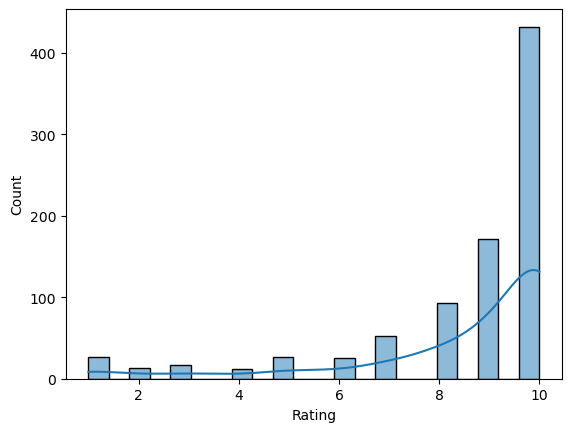

In [5]:
# Muestra la distribución de la columna "Rating"
sns.histplot(df['Rating'], kde=True)

La mayoría de las calificaciones están en el extremo superior del rango, con una calificación de 10 siendo la más común. Esto se evidencia por el pico más alto en el histograma y la línea de densidad del kernel en el valor de 10.
Las calificaciones más bajas (alrededor de 4) son mucho menos comunes, como lo demuestra la altura más baja de las barras del histograma en estos valores.
La línea de densidad del kernel sugiere que la distribución de las calificaciones es sesgada hacia la izquierda, lo que indica que las calificaciones más altas son más frecuentes que las más bajas.


In [6]:
# Obtén una lista de todas las columnas excepto 'Review'
columnas = [col for col in df.columns if col != 'Review']

# Recorre cada columna y muestra los valores únicos
for col in columnas:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print("\n")


Valores únicos en la columna 'Title':
['Never seen the anime and still enjoyed it'
 'Not My Kind of Show. But This I Loved.'
 "I'm Shocked By How Good This Is..." 'See Netflix?? You CAN do it...'
 'WE WANT SEASON 2' 'Wow! Just Big Wow!!'
 'Not an anime fan, but this a fun adventure!'
 'Netflix can make something great' 'Refreshingly Fun'
 'Best show of the year!!'
 "I was hesitant to start, but then couldn't stop"
 'The live action curse breaker' 'Already looking forward to next season'
 'Campy, silly, and so much fun' "Guys It's Really Gooood ⚡"
 'Are you kidding me?'
 'A fever dream One Piece but still very One Piece in its core'
 'People need to stop comparing...'
 "Being a pirate is the best thing!You have the wind in your back, the salty sea air, your loyal crew by your side.You never know what's in the horizon.Its all about being free!"
 'What a surprise!!' 'Perfect'
 'Glad I missed work to watch this 8 hour epic that breaks the mold'
 'WE ARE ONE' 'One of the Most Creative & Ori

No se va a categorizar nada

## ETAPA 2: ANÁLISIS DE SENTIMIENTOS.

### Paso 1. Muestre las primeras 10 filas del dataset con las columnas "Rating" y "Review", haga un análisis rápido de esa información.

### Paso 2. Haga una función que se encargue del pre-procesamiento:
#### - Genere los tokens.
#### - Filtre las palabras de parada.
#### - Obtenga el lema de las palabras y guárdelo en una lista.
#### - Retorne la lista en forma de una cadena, para ello debe unir los elementos de la lista mediante un espacio.

### Paso 3. Aplique la función creada para obtener el lema de las columnas "Review" y "Title", guárde el resultado en nuevas columnas dentro del dataframe original (por ejemplo: "ReviewText", "TitleText").

### Paso 4. Haga una función para obtener el sentimiento de las palabras, para ello puede utilizar el SentimentIntensityAnalizer() y su función "polarity_scores()". Al final debe retornar el puntaje de sentimiento.

### Paso 5. Aplique la función creada para obtener el sentimiento en las columnas creadas en el paso 3, guarde el resultado en un par de columnas nuevas (por ejemplo: "ReviewSentiment", "TitleSentiment").

### Paso 6. Prepare un dataframe con las columnas originales + las columnas creadas previamente, tendrían que haber 8 columnas, 3 de ellas deben ser numéricas (incluyendo "Rating").



In [13]:
# Paso 1: Muestra las primeras 10 filas del dataset con las columnas "Rating" y "Review"
df[['Rating', 'Review']].head(10)


,Rating,Review
0,8.0,I have to admit that I've never watched any of...
1,9.0,I'm a 60yo man & old school like the The Marin...
2,9.0,Every live action anime that I've briefly seen...
3,10.0,This is bar none one of the best live-action a...
4,10.0,"Being a one piece fan myself, I was a bit inse..."
5,10.0,GREAT ADAPTATION! As an old-school fan (since ...
6,9.0,My kids play and watch One Piece anime and lov...
7,10.0,I was so surprised that Netflix made something...
8,8.0,Parenthetically I don't know anything about th...
9,10.0,Initially I was apprehensive because of anime ...


In [14]:
# Paso 2: Función de preprocesamiento
def preprocess(text):
    # Genera los tokens
    tokens = word_tokenize(text)
    
    # Filtre las palabras de parada
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Obtenga el lema de las palabras y guárdelo en una lista
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Retorne la lista en forma de una cadena
    return ' '.join(lemmas)

In [15]:
# Paso 3: Aplica la función de preprocesamiento a las columnas "Review" y "Title"
df['ReviewText'] = df['Review'].apply(preprocess)
df['TitleText'] = df['Title'].apply(preprocess)
df[['ReviewText', 'TitleText']].head(10)

,ReviewText,TitleText
0,I admit I 've never watched animated show One ...,Never seen anime still enjoyed
1,I 'm 60yo man & old school like The Marine Adm...,Not My Kind Show . But This I Loved .
2,Every live action anime I 've briefly seen not...,I 'm Shocked By How Good This Is ...
3,This bar none one best live-action adaption an...,See Netflix ? ? You CAN ...
4,"Being one piece fan , I bit insecured starting...",WE WANT SEASON 2
5,GREAT ADAPTATION ! As old-school fan ( since 2...,Wow ! Just Big Wow ! !
6,My kid play watch One Piece anime love ! I n't...,"Not anime fan , fun adventure !"
7,I surprised Netflix made something incredible ...,Netflix make something great
8,Parenthetically I n't know anything source mat...,Refreshingly Fun
9,Initially I apprehensive anime adaptation prod...,Best show year ! !


In [16]:
# Paso 4: Función para obtener el sentimiento de las palabras


def get_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    
    # Aplica una función de umbral a los puntajes de sentimiento
    return 1 if sentiment['compound'] > 0 else 0


In [17]:
# Paso 5: Aplica la función de sentimiento a las columnas "ReviewText" y "TitleText"
df['ReviewSentiment'] = df['ReviewText'].apply(get_sentiment)
df['TitleSentiment'] = df['TitleText'].apply(get_sentiment)

In [12]:
# Paso 6: Prepara un dataframe con las columnas originales + las columnas creadas previamente
final_df = df[['Title', 'Review', 'Rating', 'ReviewText', 'TitleText', 'ReviewSentiment', 'TitleSentiment', 'Date']]
final_df.head()

,Title,Review,Rating,ReviewText,TitleText,ReviewSentiment,TitleSentiment,Date
0,Never seen the anime and still enjoyed it,I have to admit that I've never watched any of...,8.0,I admit I 've never watched animated show One ...,Never seen anime still enjoyed,1,1,4 September 2023
1,Not My Kind of Show. But This I Loved.,I'm a 60yo man & old school like the The Marin...,9.0,I 'm 60yo man & old school like The Marine Adm...,Not My Kind Show . But This I Loved .,1,1,4 September 2023
2,I'm Shocked By How Good This Is...,Every live action anime that I've briefly seen...,9.0,Every live action anime I 've briefly seen not...,I 'm Shocked By How Good This Is ...,1,1,1 September 2023
3,See Netflix?? You CAN do it...,This is bar none one of the best live-action a...,10.0,This bar none one best live-action adaption an...,See Netflix ? ? You CAN ...,1,0,4 September 2023
4,WE WANT SEASON 2,"Being a one piece fan myself, I was a bit inse...",10.0,"Being one piece fan , I bit insecured starting...",WE WANT SEASON 2,1,1,31 August 2023


## ETAPA 3: MACHINE LEARNING.

### Paso 1. Asigne a la variable X las columnas numéricas menos "Rating"; asigne a la variable Y la columna "Rating", seleccione únicamente las filas sin datos nulos (no elimine ni trate las filas con datos nulos, esas se usarán para predecir)

### Paso 2. Divida en una muestra de entrenamiento y en una muestra de pruebas, estratifique en base a la proporción de la variable objetivo. El tamaño de la muestra para entrenamiento debe ser del 85%. Asigne una semilla para poder reproducir los resultados.

### Paso 3. Entrene los siguientes modelos:
#### - KNN para clasificación
#### - SVM para clasificación
#### - RandomForest para clasificación

### Paso 4. Evalúe el rendimiento de los modelos (puede usar accuracy) creados en el paso previo, muestre las predicciones realizadas y compare con las etiquetas reales.

### Paso 5. Debido a que este es un problema de clasificación, pero hay varias clases que son originalmente numéricas, se puede aplicar también una métrica de evaluación para regresión. Aplique el RMSE a las predicciones y las etiquetas reales, analice el resultado.

### Paso 6. Utilice el modelo que se comportó mejor para predecir el "Rating" de las filas que tienen ese dato nulo, revise manualmente si la calificación predicha es consistente con el comentario en la reseña.

### Paso 7. Escriba sus conclusiones al respecto.

In [75]:
# Paso 1: Asigna a la variable X las columnas numéricas menos "Rating"; asigna a la variable y la columna "Rating"
df_no_nulls = final_df.dropna()
X = df_no_nulls[['ReviewSentiment', 'TitleSentiment']]
y = df_no_nulls['Rating']

In [76]:
# Paso 2: Divide en una muestra de entrenamiento y en una muestra de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [77]:
# Paso 3: Entrena los modelos
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

svm = SVC()
svm.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [88]:
# Para el modelo KNN
y_pred_knn = knn.predict(X_test)
print("Predicciones realizadas por KNN:")
print(y_pred_knn[:10])
print("Etiquetas reales:")
print(y_test[:10])

# Para el modelo SVM
y_pred_svm = svm.predict(X_test)
print("Predicciones realizadas por SVM:")
print(y_pred_svm[:10])
print("Etiquetas reales:")
print(y_test[:10])

# Para el modelo RandomForest
y_pred_rf = rf.predict(X_test)
print("Predicciones realizadas por RandomForest:")
print(y_pred_rf[:10])
print("Etiquetas reales:")
print(y_test[:10])


Predicciones realizadas por KNN:
[10.  1.  8. 10. 10.  2. 10.  8. 10. 10.]
Etiquetas reales:
444     7.0
762     2.0
725    10.0
815    10.0
738    10.0
474     4.0
871     9.0
526    10.0
590     9.0
250    10.0
Name: Rating, dtype: float64
Predicciones realizadas por SVM:
[10. 10. 10. 10. 10.  2. 10. 10. 10. 10.]
Etiquetas reales:
444     7.0
762     2.0
725    10.0
815    10.0
738    10.0
474     4.0
871     9.0
526    10.0
590     9.0
250    10.0
Name: Rating, dtype: float64
Predicciones realizadas por RandomForest:
[10. 10.  8. 10. 10.  2. 10.  8. 10. 10.]
Etiquetas reales:
444     7.0
762     2.0
725    10.0
815    10.0
738    10.0
474     4.0
871     9.0
526    10.0
590     9.0
250    10.0
Name: Rating, dtype: float64


In [78]:
# Paso 4: Evalúa el rendimiento de los modelos
for model in [knn, svm, rf]:
    y_pred = model.predict(X_test)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy_score(y_test, y_pred)}")

Accuracy of KNeighborsClassifier: 0.4122137404580153
Accuracy of SVC: 0.48854961832061067
Accuracy of RandomForestClassifier: 0.3816793893129771


In [103]:
# Paso 5: Aplica el RMSE a las predicciones y las etiquetas reales
for model in [knn, svm, rf]:
    y_pred = model.predict(X_test)
    print(f"RMSE of {model.__class__.__name__}: {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE of KNeighborsClassifier: 2.5562376933763744
RMSE of SVC: 2.7476568782529394
RMSE of RandomForestClassifier: 2.786280455845383


In [104]:
# Crea una máscara booleana para las filas donde 'Rating' es nulo
mask = final_df['Rating'].isnull()

# Crea df_nulls seleccionando solo las filas de final_df donde 'Rating' es nulo
df_nulls = final_df[mask]

# Utiliza el modelo KNN para predecir el "Rating" de las filas que tienen ese dato nulo
final_df.loc[mask, 'PredictedRating'] = knn.predict(final_df.loc[mask, ['ReviewSentiment', 'TitleSentiment']])

la máscara se utiliza para seleccionar un subconjunto específico de filas de un DataFrame de pandas

In [95]:
df_nulls

,Title,Review,Rating,ReviewText,TitleText,ReviewSentiment,TitleSentiment,Date,PredictedRating
143,"I didn't expect much, but I absolutely love it.","I admit, when I write reviews it's usually whe...",NaN,"I admit , I write review 's usually something ...","I n't expect much , I absolutely love .",0.9872,0.6697,25 September 2023,9.0
145,"Thank you for heading this, Oda!","Fun fact: Eiichiro Oda, the creator of the man...",NaN,"Fun fact : Eiichiro Oda , creator manga One Pi...","Thank heading , Oda !",0.9950,0.4199,12 September 2023,9.0
447,DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...,Just because there are many scenes in the mang...,NaN,"Just many scene manga n't accurate show , n't ...",DIFFERENT MEDIA MEANS DIFFERENT STORYTELLING A...,0.9753,0.0000,1 September 2023,10.0
500,I'm not sure about rating yet!,I like the characters so far except Sanji's ha...,NaN,I like character far except Sanji 's hair If c...,I 'm sure rating yet !,0.9660,0.3802,4 September 2023,10.0
520,Great adaptation!,One Piece somehow managed to pull it off: a le...,NaN,One Piece somehow managed pull : legit great l...,Great adaptation !,0.9601,0.6588,8 September 2023,9.0
540,My disappointment is immeasurable,As a life long fan of One Piece I don't know w...,NaN,As life long fan One Piece I n't know begin ? ...,My disappointment immeasurable,0.7921,-0.5106,31 August 2023,3.0
569,A must watch,If you browse there are series with more actio...,NaN,"If browse series action one piece , funnier on...",A must watch,0.9897,0.0000,2 September 2023,10.0
782,Emily Rudd's hair as Nami,Everything went so right with casting and thei...,NaN,Everything went right casting look . But prob ...,Emily Rudd 's hair Nami,0.9773,0.0000,1 September 2023,10.0


## ETAPA 4: PRESENTACIÓN DEL PROYECTO.
### Al igual que en los proyectos anteriores, suba su trabajo terminado a un repositorio nuevo de su GitHub.
### Escriba un archivo "README" y describa el proceso seguido en este trabajo.
### Al entregar este trabajo, debe subir este archivo, el archivo de instrucciones y el enlace al repositorio público de GitHub con este trabajo.